# ML Model for Segment 1 Deliverable

## Dependencies, loading csv, and preprocessing

In [1]:
# import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics

In [2]:
# read in csv as dataframe
df = pd.read_csv('https://mydataclassdb-bucket.s3.amazonaws.com/covid_and_politics_db.csv')
df.head()

,county,state,county_state,lat,long,totalpop,total_votes20,votes20_donald_trump,votes20_joe_biden,percentage20_donald_trump,...,age_55to64,age_65to74,age_75to84,age_84plus,evangelicals,protestant,catholic,orthodox,muslim,other
0,Kay,OK,"Kay, OK",36.817997,-97.144214,45173,17249,12834,4040,0.744,...,5694,4632,2724,1183,0,0,0,0,0,0
1,Abbeville,SC,"Abbeville, SC",34.223334,-82.461707,24788,12433,8215,4101,0.661,...,3584,3150,1602,591,0,0,0,0,0,0
2,Acadia,LA,"Acadia, LA",30.295065,-92.414197,62607,28425,22596,5443,0.795,...,0,0,0,0,0,0,0,0,0,0
3,Accomack,VA,"Accomack, VA",37.767072,-75.632346,32840,16938,9172,7578,0.542,...,5270,4451,2301,886,0,0,0,0,0,0
4,Ada,ID,"Ada, ID",43.452658,-116.241552,435117,259389,130699,120539,0.504,...,56615,42027,18576,7189,0,0,0,0,0,0


In [3]:
# drop unnecessary rows
df = df.drop(['county','state','county_state','lat', 'long'], axis = 1)
df.columns

Index(['totalpop', 'total_votes20', 'votes20_donald_trump',
       'votes20_joe_biden', 'percentage20_donald_trump',
       'percentage20_joe_biden', 'cases', 'deaths', 'men', 'women', 'hispanic',
       'white', 'black', 'native', 'asian', 'pacific', 'income',
       'incomepercap', 'poverty', 'professional', 'service', 'office',
       'construction', 'production', 'drive', 'carpool', 'transit', 'walk',
       'othertransp', 'workathome', 'meancommute', 'employed', 'privatework',
       'publicwork', 'selfemployed', 'familywork', 'unemployment',
       'cases_per_capita_100k', 'deaths_per_capita_100k',
       'pop_per_sq_mile_2010', 'age_oto4', 'age_5to14', 'age_15to24',
       'age_25to34', 'age_35to44', 'age_45to54', 'age_55to64', 'age_65to74',
       'age_75to84', 'age_84plus', 'evangelicals', 'protestant', 'catholic',
       'orthodox', 'muslim', 'other'],
      dtype='object')

In [4]:
# drop rows with null values and check if there are any nulls in columns after
df = df.dropna(axis = 0, how = 'any')
df.isnull().sum()

totalpop                     0
total_votes20                0
votes20_donald_trump         0
votes20_joe_biden            0
percentage20_donald_trump    0
percentage20_joe_biden       0
cases                        0
deaths                       0
men                          0
women                        0
hispanic                     0
white                        0
black                        0
native                       0
asian                        0
pacific                      0
income                       0
incomepercap                 0
poverty                      0
professional                 0
service                      0
office                       0
construction                 0
production                   0
drive                        0
carpool                      0
transit                      0
walk                         0
othertransp                  0
workathome                   0
meancommute                  0
employed                     0
privatew

In [5]:
# check data types
df.dtypes

totalpop                       int64
total_votes20                  int64
votes20_donald_trump           int64
votes20_joe_biden              int64
percentage20_donald_trump    float64
percentage20_joe_biden       float64
cases                          int64
deaths                         int64
men                            int64
women                          int64
hispanic                     float64
white                        float64
black                        float64
native                       float64
asian                        float64
pacific                      float64
income                         int64
incomepercap                   int64
poverty                      float64
professional                 float64
service                      float64
office                       float64
construction                 float64
production                   float64
drive                        float64
carpool                      float64
transit                      float64
w

In [6]:
# select cases as target
y = df.cases

In [7]:
# create features and drop target
X = df.drop(['cases'], axis = 1)

In [22]:
# instantiate model
regressor = RandomForestRegressor(n_estimators=100,random_state=48)

In [23]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48)

In [24]:
# Creating a StandardScaler instance.
scaler = RobustScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
# fit model
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=48)

In [26]:
# make predictions
predictions = regressor.predict(X_test)
predictions[:5]

array([ 549.27,  888.93, 2387.77,  351.79,  272.39])

In [27]:
# check score
regressor.score(X_train, y_train)

0.9677198333590264

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 733.6164883401921
Mean Squared Error: 3979641.75031797
Root Mean Squared Error: 1994.9039451356975


In [30]:
# Calculate feature importance in the regressor
importances = regressor.feature_importances_
importances

array([8.11157847e-02, 2.76823844e-02, 1.64200348e-01, 2.63034270e-02,
       1.52771828e-03, 2.54681917e-03, 2.60692368e-01, 1.43137825e-01,
       1.04402683e-01, 1.98901897e-03, 1.57845195e-03, 1.93436914e-03,
       4.01654603e-04, 4.30115182e-04, 4.81174067e-04, 3.25549856e-03,
       2.58389902e-03, 3.42772585e-03, 1.64163824e-03, 2.13310228e-03,
       1.14969016e-03, 4.09468148e-04, 9.53255595e-04, 2.23243018e-04,
       1.07868204e-03, 6.22968590e-04, 5.26761062e-04, 4.30615679e-04,
       1.57557735e-03, 1.56904532e-03, 4.71678588e-02, 6.38563628e-04,
       1.10829801e-03, 2.50833159e-03, 1.27589949e-04, 2.27083847e-03,
       8.62839835e-03, 1.09283803e-07, 2.23123377e-03, 6.72488747e-03,
       3.87488566e-03, 3.15466252e-02, 2.92548661e-03, 2.29239635e-02,
       1.03521691e-02, 5.89751315e-03, 9.94196384e-04, 7.82790511e-03,
       2.24582582e-03, 6.53019454e-12, 0.00000000e+00, 2.06551527e-09,
       1.56664167e-09, 3.74721661e-09, 2.99477815e-11])

In [31]:
# sort the features by their importance.
feature_importances = sorted(zip(regressor.feature_importances_, X.columns), reverse=True)
feature_importances

[(0.26069236831446413, 'deaths'),
 (0.16420034846267711, 'votes20_donald_trump'),
 (0.1431378249134432, 'men'),
 (0.10440268265937068, 'women'),
 (0.08111578467958398, 'totalpop'),
 (0.04716785881934374, 'employed'),
 (0.03154662521430029, 'age_15to24'),
 (0.027682384427886838, 'total_votes20'),
 (0.026303426953070183, 'votes20_joe_biden'),
 (0.022923963495805735, 'age_35to44'),
 (0.010352169096543802, 'age_45to54'),
 (0.008628398354099719, 'cases_per_capita_100k'),
 (0.007827905105933489, 'age_75to84'),
 (0.006724887474755612, 'age_oto4'),
 (0.005897513151256647, 'age_55to64'),
 (0.003874885664137116, 'age_5to14'),
 (0.0034277258526280298, 'poverty'),
 (0.0032554985555182376, 'income'),
 (0.0029254866137291176, 'age_25to34'),
 (0.0025838990214270513, 'incomepercap'),
 (0.0025468191743077905, 'percentage20_joe_biden'),
 (0.0025083315884546877, 'selfemployed'),
 (0.0022708384696025225, 'unemployment'),
 (0.0022458258235557404, 'age_84plus'),
 (0.0022312337680763855, 'pop_per_sq_mile_201

In [32]:
# put predictions in a dataframe
predictions_df = pd.DataFrame(predictions, columns = ['predictions'])
predictions_df.head()

,predictions
0,549.27
1,888.93
2,2387.77
3,351.79
4,272.39


In [33]:
# put feature importances in a dataframe
feature_importance_df = pd.DataFrame(feature_importances, columns = ['importance', 'feature'])
feature_importance_df = feature_importance_df[['feature', 'importance']]
feature_importance_df

,feature,importance
0,deaths,2.606924e-01
1,votes20_donald_trump,1.642003e-01
2,men,1.431378e-01
3,women,1.044027e-01
4,totalpop,8.111578e-02
5,employed,4.716786e-02
6,age_15to24,3.154663e-02
7,total_votes20,2.768238e-02
8,votes20_joe_biden,2.630343e-02
9,age_35to44,2.292396e-02


In [34]:
# slice the dataframe to get the top most important features
graph_top10 = feature_importance_df.iloc[0:11]
graph_top10

,feature,importance
0,deaths,0.260692
1,votes20_donald_trump,0.164200
2,men,0.143138
3,women,0.104403
4,totalpop,0.081116
5,employed,0.047168
6,age_15to24,0.031547
7,total_votes20,0.027682
8,votes20_joe_biden,0.026303
9,age_35to44,0.022924


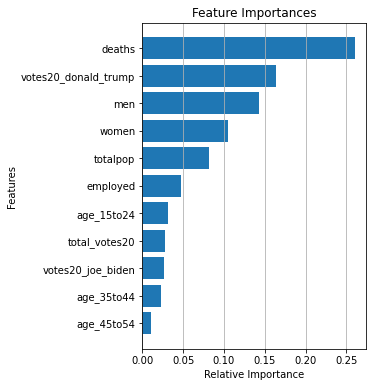

In [35]:
# graph the most important features
plt.title('Feature Importances')
plt.barh(graph_top10['feature'],width=graph_top10['importance'])
plt.title('Feature Importances')
plt.ylabel('Features')
plt.xlabel('Relative Importance')
plt.grid(axis='x')
plt.gca().invert_yaxis()
fig = plt.gcf()
fig.set_size_inches(4, 6)
plt.show()